# Exploratory Data Analysis (EDA)

## Introducción
Este análisis exploratorio tiene como objetivo comprender mejor la distribución de las variables clave en los datos, así como las relaciones entre ellas. Esto nos permitirá tomar decisiones informadas en las etapas posteriores del proyecto.


## 1. Cargar Librerías y Datos


In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Configuración del Entorno

In [4]:
# Configuración de opciones de pandas
pd.set_option('display.max_columns', None)

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")

# Configuración para reproducibilidad
np.random.seed(42)

data_dir = '../data/'
models_dir = '../models/'


## 3. Carga de Datos


In [5]:
# Cargar los datasets de ventas y geográficos
sales_df = pd.read_csv(f'{data_dir}product_sales.csv')
geo_df = pd.read_csv(f'{data_dir}geo.csv')

sales_df.shape,geo_df.shape

((227355, 5), (10805, 4))

In [6]:
sales_df.head(3)

,country,product_id,date,zipcode,sales
0,M,bded4d22-a25e-4b42-b9d6-41d3b1a5f71b,2024-07-21,85890.0,3.0
1,M,0310455e-2ec8-4e02-8a12-b59424678ff2,2024-08-06,97267.0,9999
2,B,c5b9d75d-86bc-4e87-87c4-1d751096d21a,2024-07-10,13212117.0,1.0


In [7]:
geo_df.head(2)

,country,s_zipcode,e_zipcode,city
0,B,63700000,63740000,B1
1,B,57968000,57980000,B1


## 4. Análisis Descriptivo de los Datos

In [27]:
sales_df.info()
# contiene null zipcode y sale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227355 entries, 0 to 227354
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     227355 non-null  object 
 1   product_id  227355 non-null  object 
 2   date        227355 non-null  object 
 3   zipcode     226547 non-null  float64
 4   sales       227314 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.7+ MB


In [68]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10805 entries, 0 to 10804
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10805 non-null  object
 1   s_zipcode  10805 non-null  int64 
 2   e_zipcode  10805 non-null  int64 
 3   city       10805 non-null  object
dtypes: int64(2), object(2)
memory usage: 337.8+ KB


In [71]:
sales_df.describe(include=object)

,count,unique,top,freq
country,227355,5,B,148061
product_id,227355,990,fb60ac97-2463-4245-b533-337e2fcef4af,9846
sales,227314,45,1.0,162533


In [41]:
sales_df.sales.value_counts(1,dropna=False).head(10)

sales
1.0      0.714886
9999     0.175109
2.0      0.066579
3.0      0.020589
4.0      0.009602
5.0      0.003950
6.0      0.003308
10.0     0.001346
xfffx    0.001188
8.0      0.000787
Name: proportion, dtype: float64

In [42]:
sales_df.country.value_counts(1,dropna=False).head(10)

country
B     0.651233
M     0.295164
A     0.048959
C     0.003211
CO    0.001434
Name: proportion, dtype: float64

In [8]:
# cambiar de formato
sales_df['date']=pd.to_datetime(sales_df['date']).dt.date

sales_df['sales_numeric']=pd.to_numeric(sales_df['sales'],errors='coerce')

In [9]:
sales_df[sales_df['sales_numeric'].isnull()].sales.value_counts(dropna=False).head()

sales
xfffx    270
NaN       41
Name: count, dtype: int64

In [10]:
sales_df[['date','sales_numeric','zipcode']].describe().T

,count,mean,std,min,25%,50%,75%,max
sales_numeric,227044.0,1.754367e+03,3.801800e+03,1.0,1.0,1.0,2.0,9999.0
zipcode,226547.0,2.493357e+07,3.042109e+07,1000.0,67303.0,13049012.0,38402270.5,99990000.0


### Analisis Univariado Y Bivaridado

### Analisis zipcode

In [ ]:
# me llamo la atencion el zipcode maximo 99990000.0
# los valores faltantes

In [136]:
sales_df['zipcode'].value_counts().sort_index(ascending=False).head(10)

zipcode
99990000.0     1
99980000.0     3
99965000.0     1
99960000.0     3
99952000.0     5
99950000.0    37
99940000.0     1
99930000.0     2
99920000.0     4
99900000.0    14
Name: count, dtype: int64

In [138]:
geo_df[geo_df['s_zipcode']>=99990000].head()

,country,s_zipcode,e_zipcode,city
10804,B,99990000,99999999,B2


In [128]:
sales_df[sales_df['zipcode']==99990000].head()

# no es un valor quemado sino un codigo real 

,country,product_id,date,zipcode,sales,sales_numeric,null_sale,null_zipcode
138790,B,449a2db0-8cc6-4f58-935f-1dbe6046a779,2024-06-11,99990000.0,1.0,1.0,no,no


In [37]:
sales_df['null_zipcode']=np.where(sales_df['zipcode'].isnull(),'si','no')

### Analisis sale

In [38]:
# en analsisi exploratorio se observa que el 9999 es una imputacion, se podria hacer una marca en la base para ver si puede funcionar como una feature 

sales_df['sales_final']=np.where(sales_df['sales_numeric'].isin([9999,np.nan]),np.nan,sales_df['sales_numeric'])

In [36]:
sales_df['null_sale']=np.where(sales_df['sales_final'].isin([np.nan]),'si','no')

In [159]:
pd.crosstab(index=sales_df['country'],
            columns=sales_df['null_sale'],
            normalize='index',
            margins=True)

# se observa una distribucion similar por country de los valores null

null_sale,no,si
country,,
A,0.828317,0.171683
B,0.824201,0.175799
C,0.806849,0.193151
CO,0.812883,0.187117
M,0.821464,0.178536
All,0.823523,0.176477


In [141]:
df_null_acum=pd.crosstab(index=sales_df['product_id'],
            columns=sales_df['null_sale'],
            normalize='columns',
            margins=False).sort_values(['si'],ascending=False).reset_index()

df_null_acum['sales_cumulative_nan']= df_null_acum['si'].cumsum()
df_null_acum[df_null_acum['sales_cumulative_nan']<0.8].shape,df_null_acum.shape

## del total de lo null distribuido por los productos el 80% esta en el 23% de los productos

((231, 4), (990, 4))

In [122]:
pd.crosstab(index=sales_df['product_id'],
            columns=sales_df['null_sale'],
            normalize='index',
            margins=False).sort_values(['no'],ascending=True).head(10)

# hay 6 productos que su venta fue null

null_sale,no,si
product_id,,
fedef20d-4e40-42e3-968d-e5042b32c180,0.000000,1.000000
8fb5c53e-f6c3-4335-9229-b118fa4f6cf9,0.000000,1.000000
aa6d7784-9015-427d-8e9a-9386500418cc,0.000000,1.000000
0c8df675-76e9-4556-877f-d2c31e55f329,0.000000,1.000000
497beefb-58ce-4037-89ad-001d87d96fbe,0.000000,1.000000
a50e2069-7e7d-4cae-97b9-edb93107050a,0.000000,1.000000
9019c898-92cc-4125-836e-1debb9a9f806,0.200000,0.800000
785ac3f5-4c76-4140-b4ea-2114f1a06d4f,0.250000,0.750000
7b22adb8-3330-46e3-966a-292e8b433671,0.307692,0.692308


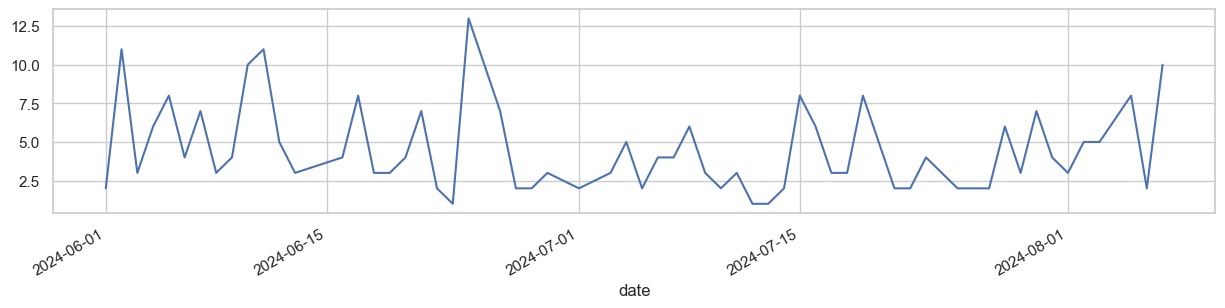

In [75]:
plt.figure(figsize=(15, 3))
sales_df[sales_df['sales'].isin(['xfffx'])].date.value_counts().sort_index().plot()
plt.show()

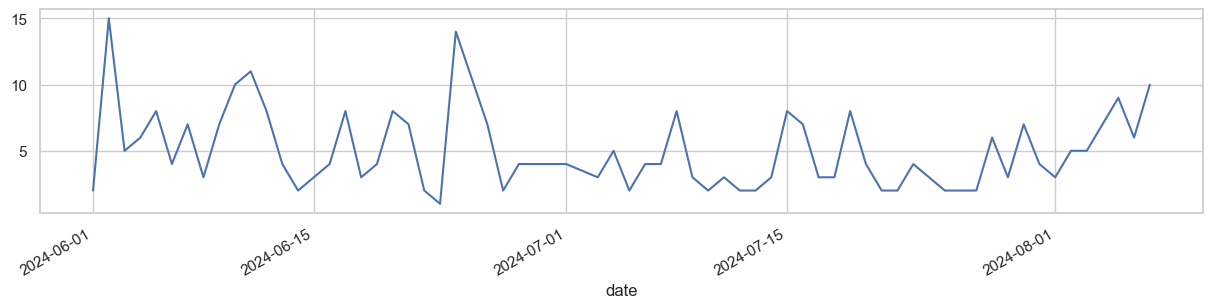

In [67]:
plt.figure(figsize=(15, 3))
sales_df[sales_df['sales_numeric'].isin([np.nan])].date.value_counts().sort_index().plot()
plt.show()

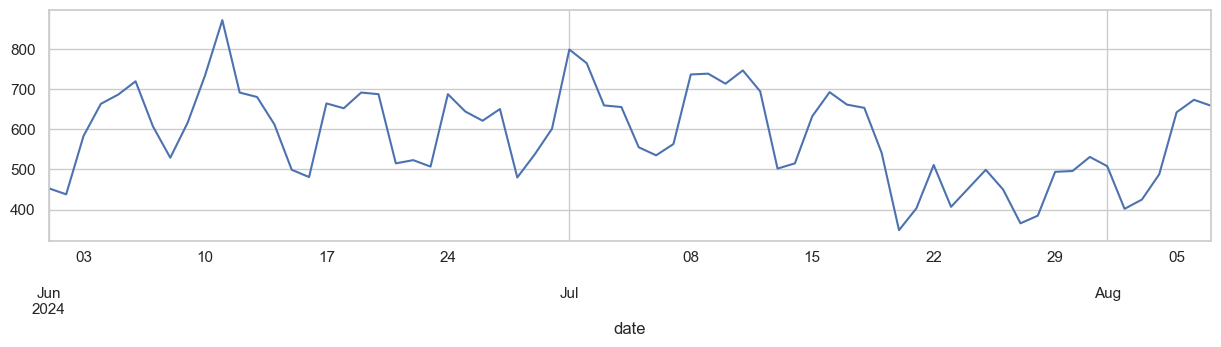

In [66]:
plt.figure(figsize=(15, 3))
sales_df[sales_df['sales_numeric'].isin([9999])].date.value_counts().sort_index().plot()
plt.show()

In [ ]:
# lo null se distribuyen en todos los peridos. no se observa una consetraccion en algun periodo especifico 

In [127]:
pd.crosstab(index=sales_df['null_zipcode'],
            columns=sales_df['null_sale'],
            #normalize='index',
            margins=True)

## en un principio se podria descartar lo que tienen null tanto en las ventas como en zipcode, ya que hay dos informacion desconocida, para el preducto en cuestion no se sabe la cantidad ni la zona donde se vendio
## los null zipcode (656) se puede generar como una region "null" dentro de cada pais y luego con el negocio entender mejor. si no representa una region especifica se podria luego proratera esa cantidad 
## Los null que tengo el zipcode pero no las ventas (39971) voy a buscar el "mejor" criterio para imputarlos

null_sale,no,si,All
null_zipcode,,,
no,186576,39971,226547
si,656,152,808
All,187232,40123,227355


### Analisis country

In [161]:
sales_df.head(2)

,country,product_id,date,zipcode,sales,sales_numeric,null_sale,null_zipcode,sales_final
0,M,bded4d22-a25e-4b42-b9d6-41d3b1a5f71b,2024-07-21,85890.0,3.0,3.0,no,no,3.0
1,M,0310455e-2ec8-4e02-8a12-b59424678ff2,2024-08-06,97267.0,9999,9999.0,si,no,NaN


In [124]:
# me aseguro que no tengan espacios
sales_df['country']=sales_df['country'].str.strip()
geo_df['country']=geo_df['country'].str.strip()

sales_df['country'].nunique(),geo_df['country'].nunique()

(5, 2)

In [150]:
geo_df['country'].value_counts(1),sales_df['country'].value_counts(1)

(country
 M    0.770939
 B    0.229061
 Name: proportion, dtype: float64,
 country
 B     0.651233
 M     0.295164
 A     0.048959
 C     0.003211
 CO    0.001434
 Name: proportion, dtype: float64)

In [171]:
## ventas acumuladas
sales_df.groupby(['country']).agg(
    total_ventas=('sales_final','sum'),
    ).sort_values(
        ['total_ventas'],ascending=False).cumsum()/sales_df['sales_final'].sum()

,total_ventas
country,
B,0.648651
M,0.943575
A,0.992685
C,0.998598
CO,1.000000


In [9]:
# transacciones acumuladas
sales_df['country'].value_counts(1).cumsum()

country
B     0.651233
M     0.946397
A     0.995355
C     0.998566
CO    1.000000
Name: proportion, dtype: float64

In [151]:
## se observa que la base geo df solo tiene 2 paises y que la base de sale el country B y M acumula cerca del 95% de las ventas 
## A modo de simplificar el problema y por falta de informacion para los demas paises se decide avanzar con los country B y M

In [14]:
sales_df.head(2)

,country,product_id,date,zipcode,sales,sales_numeric,null_zipcode,sales_final
0,M,bded4d22-a25e-4b42-b9d6-41d3b1a5f71b,2024-07-21,85890.0,3.0,3.0,no,3.0
1,M,0310455e-2ec8-4e02-8a12-b59424678ff2,2024-08-06,97267.0,9999,9999.0,no,NaN


In [15]:
geo_df.head()

,country,s_zipcode,e_zipcode,city
0,B,63700000,63740000,B1
1,B,57968000,57980000,B1
2,B,46966970,46970000,B1
3,B,44600000,44640000,B1
4,B,49670000,49700000,B1


### Union de bases

In [224]:
## se aplica los criterios anteriormente mencionados

df_sale_=sales_df[(sales_df['country'].isin(['B','M']))
         &(~((sales_df['sales_final'].isnull())&(sales_df['zipcode'].isnull())))].copy()

In [46]:
df_sale_.country.value_counts(),sales_df.country.value_counts()

(country
 B    148051
 M     67104
 Name: count, dtype: int64,
 country
 B     148061
 M      67107
 A      11131
 C        730
 CO       326
 Name: count, dtype: int64)

In [47]:
pd.crosstab(index=df_sale_['null_zipcode'],
            columns=df_sale_['null_sale'],
            #normalize='index',
            margins=True)

## se observa que el criterio se refleja en la tabla
## se observa 41 registros que no tienen zipcode y si ventas , esto representa menos del 0.001% por lo tanto se decide descartar estos registros

null_sale,no,si,All
null_zipcode,,,
no,177117,37997,215114
si,41,0,41
All,177158,37997,215155


In [44]:
pd.crosstab(index=df_sale_['null_zipcode'],
            columns=df_sale_['null_sale'],
            normalize='columns',
            margins=True)

null_sale,no,si,All
null_zipcode,,,
no,0.999769,1.0,0.999809
si,0.000231,0.0,0.000191


In [125]:
## se aplica los criterios anteriormente mencionados

df_sale_=sales_df[(sales_df['country'].isin(['B','M']))
         &(~sales_df['zipcode'].isnull())].copy()

df_sale_['zipcode']=df_sale_['zipcode'].astype(int)

print(df_sale_.shape)

pd.crosstab(index=df_sale_['null_zipcode'],
            columns=df_sale_['null_sale'],
            normalize='index',
            margins=True)

(215114, 9)


null_sale,no,si
null_zipcode,,
no,0.823363,0.176637
All,0.823363,0.176637


In [63]:
import pandasql as psql

## con sql es mas facil hacer este cruce 
query = """
SELECT 
    s.country, 
    s.product_id, 
    s.date, 
    s.zipcode, 
    s.sales, 
    g.s_zipcode,
    g.e_zipcode,
    g.city
FROM 
    df_sale_ s
left JOIN 
    geo_df g
ON 1=1
    and s.country = g.country 
    and s.zipcode >= g.s_zipcode 
    and s.zipcode <= g.e_zipcode
"""

# Ejecutar la consulta SQL
result_df = psql.sqldf(query, locals())

result_df.shape,df_sale_.shape

((239324, 8), (215114, 9))

In [51]:
result_df.head()

,country,product_id,date,zipcode,sales,s_zipcode,e_zipcode,city
0,M,bded4d22-a25e-4b42-b9d6-41d3b1a5f71b,2024-07-21 00:00:00.000000,85890.0,3.0,85820.0,85896.0,M2
1,M,0310455e-2ec8-4e02-8a12-b59424678ff2,2024-08-06 00:00:00.000000,97267.0,9999,97198.0,97337.0,M5
2,B,c5b9d75d-86bc-4e87-87c4-1d751096d21a,2024-07-10 00:00:00.000000,13212117.0,1.0,13201000.0,13230001.0,B3
3,B,b7a56357-a4a2-4bdf-94be-cb82636bd7ec,2024-07-12 00:00:00.000000,88340455.0,1.0,88330003.0,88350001.0,B2
4,B,2aac125e-5623-4206-8161-881a28d7826c,2024-07-19 00:00:00.000000,99840000.0,9999,99725000.0,99840000.0,B2


In [59]:
# se observa que hay registros duplicados por city 

result_df.groupby(['product_id','date','zipcode']).agg(total=('city','nunique')).total.value_counts(1)

total
1    0.984235
2    0.015765
Name: proportion, dtype: float64

In [57]:
result_df.groupby(['product_id','date','zipcode']).agg(total=('city','nunique')).sort_values('total',ascending=False).head()

,,,total
product_id,date,zipcode,
5de72eab-3078-4d23-8469-027431b2b410,2024-06-23 00:00:00.000000,38260.0,2
8779965c-df5b-414a-8ec6-b7731e74ba6f,2024-07-16 00:00:00.000000,29180.0,2
4d9ad337-ffe3-49de-9e79-70c73c574dbe,2024-07-11 00:00:00.000000,29960.0,2
72b01e61-96b7-4e02-a9b7-99712307f69d,2024-06-29 00:00:00.000000,98710.0,2
2b6ec472-e060-43ed-b343-cc9052eb11be,2024-07-13 00:00:00.000000,48680000.0,2


In [71]:
result_df[(result_df["product_id"]=='5de72eab-3078-4d23-8469-027431b2b410')&
          (result_df["date"]=='2024-06-23 00:00:00.000000')&
          (result_df["zipcode"]==38260.0)].head()

# se aprecia que los rango de zipcode conciden s_zipcode M1 es igual a e_zipcode de M3

,country,product_id,date,zipcode,sales,s_zipcode,e_zipcode,city
101106,M,5de72eab-3078-4d23-8469-027431b2b410,2024-06-23 00:00:00.000000,38260.0,2.0,38256,38260,M3
101107,M,5de72eab-3078-4d23-8469-027431b2b410,2024-06-23 00:00:00.000000,38260.0,2.0,38260,38265,M1


In [85]:
geo_df.sort_values(['country','e_zipcode','city'],ascending=[False,True,True]).head()
## se aprecia que s_zipcode incluye el 0 va hasta e_zipcode <1000
## Pero para el ultimo e_zipcode tiene que incluir el 9999 


,country,s_zipcode,e_zipcode,city
6236,M,0,1000,M3
5634,M,1000,1010,M3
4629,M,1010,1020,M3
6825,M,1020,1080,M3
8545,M,1080,1089,M3


In [126]:
## Se aplica una correcion a la query 
query = """
SELECT 
    s.country, 
    s.product_id, 
    s.date, 
    s.zipcode, 
    s.sales, 
    g.s_zipcode,
    g.e_zipcode,
    g.city
FROM 
    df_sale_ s
left JOIN 
    geo_df g
ON 1=1
    and s.country = g.country 
    and s.zipcode >= g.s_zipcode 
    and (s.zipcode < g.e_zipcode or (s.country='M' and s.zipcode=99999) or (s.country='B' and s.zipcode=99999999))
"""

# Ejecutar la consulta SQL
result_df_2 = psql.sqldf(query, locals())

result_df_2.shape,df_sale_.shape

((215114, 8), (215114, 9))

In [127]:
result_df_2.head()

,country,product_id,date,zipcode,sales,s_zipcode,e_zipcode,city
0,M,bded4d22-a25e-4b42-b9d6-41d3b1a5f71b,2024-07-21,85890,3.0,85820,85896,M2
1,M,0310455e-2ec8-4e02-8a12-b59424678ff2,2024-08-06,97267,9999,97198,97337,M5
2,B,c5b9d75d-86bc-4e87-87c4-1d751096d21a,2024-07-10,13212117,1.0,13201000,13230001,B3
3,B,b7a56357-a4a2-4bdf-94be-cb82636bd7ec,2024-07-12,88340455,1.0,88330003,88350001,B2
4,B,2aac125e-5623-4206-8161-881a28d7826c,2024-07-19,99840000,9999,99840000,99910000,B2


In [143]:
result_df_2['sales_numeric']=pd.to_numeric(result_df_2['sales'],errors='coerce')
result_df_2['sales_final']=np.where(result_df_2['sales_numeric'].isin([9999,np.nan]),np.nan,result_df_2['sales_numeric'])
result_df_2['date'] = pd.to_datetime(result_df_2['date'])

In [129]:
result_df_2.groupby(['product_id','city']).agg(ventas=('sales_final','sum')).describe([i/100 for i in range(10,100,10)]).T


,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
ventas,2951.0,76.165707,315.274469,0.0,2.0,4.0,6.0,10.0,15.0,24.0,39.0,69.0,155.0,11037.0


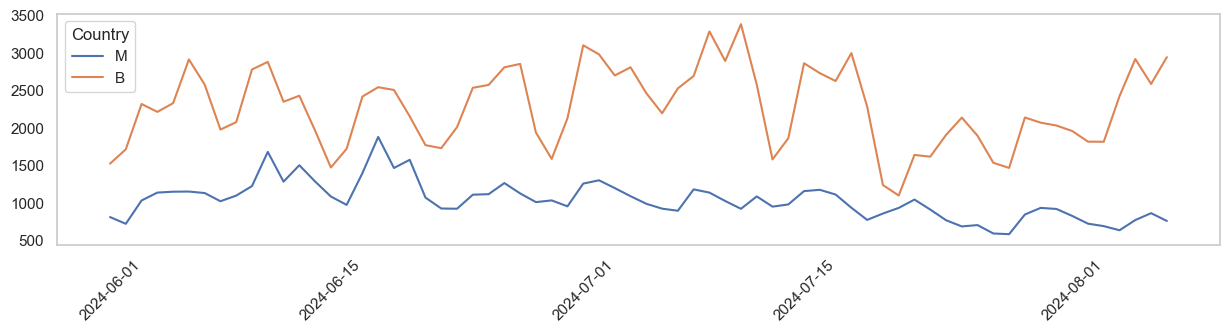

In [229]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 3))

for country in result_df_2['country'].unique():
    country_df = result_df_2[result_df_2['country'] == country]
    # Agrupar y graficar con etiqueta de país
    ax.plot(country_df.groupby(['date']).agg(ventas=('sales_final', 'sum')).sort_index(), label=country)


ax.legend(title='Country')

plt.xticks(rotation=45)
ax.grid(False)
plt.show()
## se aprecia una similitud en el comportamiento estacional entre los paises 

In [150]:
result_df_2.groupby(['product_id','city']).agg(ventas=('sales_final','sum')).sort_values('ventas').head()

,,ventas
product_id,city,
fedef20d-4e40-42e3-968d-e5042b32c180,B3,0.0
cc5f6261-0ea3-45a0-b298-510b4421d470,B1,0.0
82de61da-c840-428d-acc1-2282895d3e96,M2,0.0
7e555914-eddf-410e-8224-c57f8ef85dcc,M1,0.0
78df70b4-c2da-41f4-8e52-e9c3cbf30866,B1,0.0


In [151]:
result_df_2['null_sale']=np.where(result_df_2['sales_final'].isin([np.nan]),'si','no')

In [175]:
result_df_2.pivot_table(index=['product_id','city','date'],
                        columns='null_sale',
                        aggfunc='size',
                        fill_value=0
                        ).reset_index().sort_values('si',ascending=False).head(10)

null_sale,product_id,city,date,no,si
12100,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-07-11,570,116
12098,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-07-09,480,101
44098,fb60ac97-2463-4245-b533-337e2fcef4af,B3,2024-07-18,462,83
12101,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-07-12,405,82
12123,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-08-07,470,78
12099,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-07-10,332,78
44077,fb60ac97-2463-4245-b533-337e2fcef4af,B3,2024-06-27,301,70
44091,fb60ac97-2463-4245-b533-337e2fcef4af,B3,2024-07-11,302,68
44114,fb60ac97-2463-4245-b533-337e2fcef4af,B3,2024-08-05,289,63
12092,49c37155-4d51-4711-b4fb-b76b4f4f8f26,B3,2024-07-02,232,63


In [193]:
## caso de estudio

result_df_2[(result_df_2["product_id"]=='49c37155-4d51-4711-b4fb-b76b4f4f8f26')
            &(result_df_2["city"]=='B3')
            &(result_df_2["date"]=='2024-07-11')].sales_final.value_counts()

## para este caso se podria imputar por 1, ya que el 96% de los registros se registro 1 venta . 

sales_final
1.0    549
2.0     20
3.0      1
Name: count, dtype: int64

In [182]:
## filtro de los los registros con null

df_ids_null=result_df_2[result_df_2["null_sale"]=='si'][['product_id','city','date']].drop_duplicates()

In [200]:
df_null_ids=result_df_2.merge(df_ids_null,on=['product_id','city','date']).groupby(['product_id','city','date']).agg(
    media_sales_final=('sales_final','median'),
    total=('sales_final','size')
).reset_index()

print(df_null_ids.shape)
df_null_ids.head(20)

(14785, 5)


,product_id,city,date,media_sales_final,total
0,00afde38-77a7-410e-8f94-9d1110a44693,B3,2024-06-06,1.0,3
1,00afde38-77a7-410e-8f94-9d1110a44693,B3,2024-06-07,1.0,9
2,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-06-17,1.0,5
3,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-07-07,NaN,1
4,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-07-10,NaN,3
5,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-07-11,1.0,5
6,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-08-01,NaN,1
7,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,2024-08-06,NaN,2
8,00fcdebe-63de-4e41-bcbe-1d13017ae42c,M5,2024-07-24,NaN,1
9,015ad371-f82f-4eba-ab3a-dc4c77262d23,B3,2024-06-04,1.0,7


In [201]:
# si se analiza por dia de venta del producto en la city por fecha se observa que la media del 61% de las cantidades es 1
# un 30% es null, ya que la unica venta que se hizo para ese producto ,city y fecha fue registrado como null
df_null_ids.media_sales_final.value_counts(1,dropna=False).head()

media_sales_final
1.0    0.616909
NaN    0.306256
2.0    0.037606
1.5    0.013121
3.0    0.011566
Name: proportion, dtype: float64

In [203]:
# agrupamos a nivel producto y city

df_null_ids_2=result_df_2.merge(df_ids_null,on=['product_id','city']).groupby(['product_id','city']).agg(
    media_sales_final=('sales_final','median'),
    total=('sales_final','size')
).reset_index()

print(df_null_ids_2.shape)
df_null_ids_2.head()

(2100, 4)


,product_id,city,media_sales_final,total
0,00afde38-77a7-410e-8f94-9d1110a44693,B3,1.0,38
1,00dac0d3-3b8f-4d7f-919a-bfb852e11148,B3,1.0,426
2,00fcdebe-63de-4e41-bcbe-1d13017ae42c,M5,NaN,1
3,015ad371-f82f-4eba-ab3a-dc4c77262d23,B3,1.0,406
4,016910ce-27cd-4536-9b14-96e9caec3f56,B3,1.0,1416


In [204]:
# se observa que la media de 1 aumenta al 90% y solo el 3% no presento venta para producto, citi

df_null_ids_2.media_sales_final.value_counts(1,dropna=False).head()

media_sales_final
1.0    0.907619
NaN    0.036190
2.0    0.034286
1.5    0.007619
3.0    0.007619
Name: proportion, dtype: float64

In [205]:
# agrupamos a nivel producto y city
df_null_ids_3=result_df_2.merge(df_ids_null,on=['product_id']).groupby(['product_id']).agg(
    media_sales_final=('sales_final','median'),
    total=('sales_final','size')
).reset_index()

print(df_null_ids_3.shape)
df_null_ids_3.head()

(833, 3)


,product_id,media_sales_final,total
0,00afde38-77a7-410e-8f94-9d1110a44693,1.0,42
1,00dac0d3-3b8f-4d7f-919a-bfb852e11148,1.0,516
2,00fcdebe-63de-4e41-bcbe-1d13017ae42c,1.0,23
3,015ad371-f82f-4eba-ab3a-dc4c77262d23,1.0,455
4,016910ce-27cd-4536-9b14-96e9caec3f56,1.0,1416


In [206]:
# se observa que la media de 1 aumenta al 95% y solo el 0.7% no presento venta para producto

df_null_ids_3.media_sales_final.value_counts(1,dropna=False).head()

media_sales_final
1.0    0.950780
2.0    0.028812
NaN    0.007203
3.0    0.004802
4.0    0.002401
Name: proportion, dtype: float64

## 5. Conclusiones Analisis Explotario inicial

### Conclusiones del Análisis Exploratorio

1. **Concentración de Ventas en Países B y M:** El 95% de las ventas acumuladas provienen de los países B y M. Dado que la base de datos geográfica (`geo.csv`) solo contiene información para estos dos países, se decide enfocar el modelado exclusivamente en ellos.

2. **Manejo de Datos Faltantes en `zipcode`:** Tras filtrar la base de datos para incluir solo los países B y M, se observó que los registros con valores nulos en `zipcode` representan menos del 0.01% del total. Debido a su baja incidencia, se optó por excluir estos registros del análisis.

3. **Imputación de Valores Faltantes en `sales`:** Los valores faltantes en la columna `sales` se imputarán con un valor de 1. Esta decisión se basa en el análisis de la media de ventas para los registros con la misma fecha, producto y ciudad, que es de 1 en la mayoría de los casos. Aunque un pequeño porcentaje de productos presenta una media superior a 1, se decidió optar por una imputación conservadora para simplificar el proceso.


In [213]:
# Cargar los datos desde archivos CSV
sales_df = pd.read_csv(f'{data_dir}product_sales.csv')
geo_df = pd.read_csv(f'{data_dir}geo.csv')

# quitar los espacios
sales_df['country']=sales_df['country'].str.strip()
geo_df['country']=geo_df['country'].str.strip()


# filtrar 
df_sale_=sales_df[(sales_df['country'].isin(['B','M']))
         &(~sales_df['zipcode'].isnull())].copy()

df_sale_['zipcode']=df_sale_['zipcode'].astype(int)

# tranformacion sales en numerica, 
df_sale_['sales']=pd.to_numeric(df_sale_['sales'],errors='coerce')
df_sale_['sales']=np.where(df_sale_['sales'].isin([9999,np.nan]),np.nan,df_sale_['sales'])

In [209]:
## con sql es mas facil hacer este cruce 
query = """
SELECT 
    s.country, 
    s.product_id, 
    s.date, 
    s.zipcode, 
    s.sales, 
    g.s_zipcode,
    g.e_zipcode,
    g.city
FROM 
    df_sale_ s
left JOIN 
    geo_df g
ON 1=1
    and s.country = g.country 
    and s.zipcode >= g.s_zipcode 
    and (s.zipcode < g.e_zipcode or (s.country='M' and s.zipcode=99999) or (s.country='B' and s.zipcode=99999999))
"""

# Ejecutar la consulta SQL
df_merge = psql.sqldf(query, locals())

df_merge.shape,df_sale_.shape

((215114, 8), (215114, 9))

In [214]:
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['product_id']=df_merge['product_id'].str.strip()

In [215]:
# guardo base
df_merge.to_parquet(f'{data_dir}base_merge.parquet')

## 6. Analisis Serie

In [13]:
df_merge=pd.read_parquet(f'{data_dir}base_merge.parquet')

In [14]:
datos_b=df_merge[df_merge['country'] == 'B'].groupby(['date']).agg(ventas=('sales', 'sum')).sort_index()
datos_m=df_merge[df_merge['country'] == 'M'].groupby(['date']).agg(ventas=('sales', 'sum')).sort_index()

### Descomposición de series

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

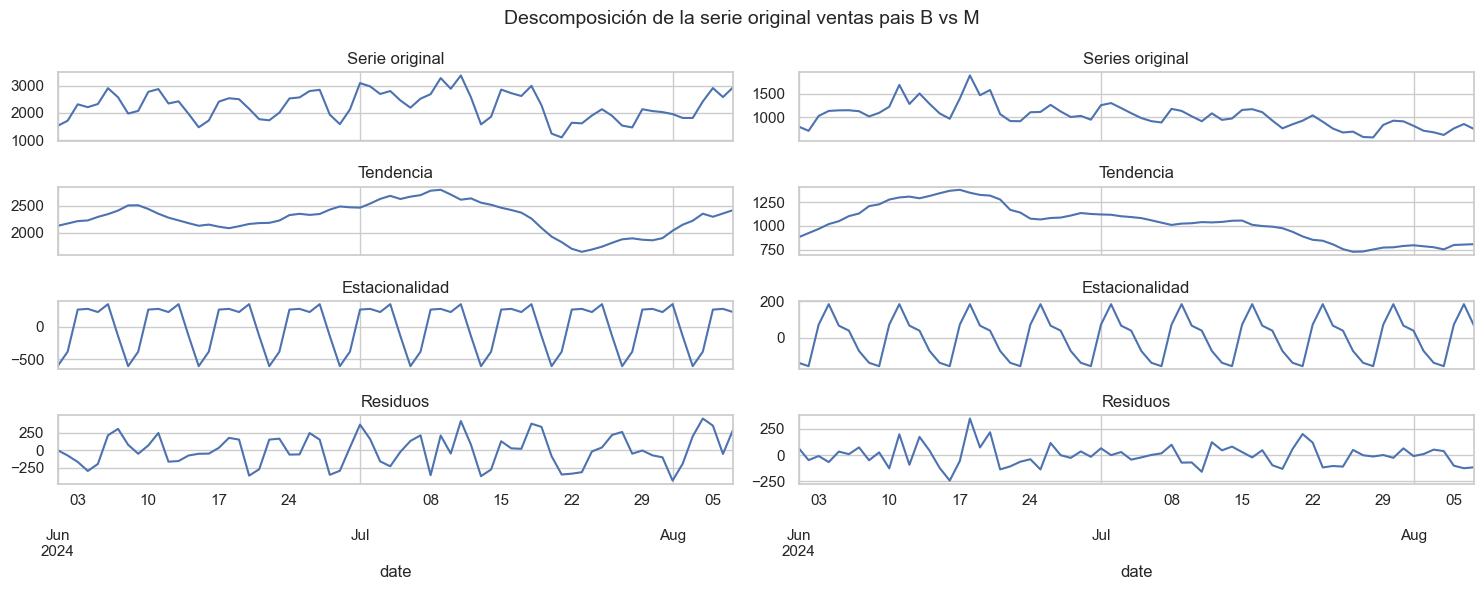

In [17]:
res_descompose_b = seasonal_decompose(datos_b, model='additive', extrapolate_trend='freq')
res_descompose_m = seasonal_decompose(datos_m, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 6), sharex=True)
res_descompose_b.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=12)
res_descompose_b.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=12)
res_descompose_b.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=12)
res_descompose_b.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=12)
res_descompose_m.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series original', fontsize=12)
res_descompose_m.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_m.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=12)
res_descompose_m.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=12)
fig.suptitle('Descomposición de la serie original ventas pais B vs M', fontsize=14)
fig.tight_layout();

#### 1. **Tendencia:** 
   - **País B:** La tendencia en el país B muestra un crecimiento en las ventas, alcanzando un pico en algún punto del período analizado, seguido de una leve disminución o estabilización.
   - **País M:** De manera similar, el país M también muestra una tendencia ascendente, pero con un pico más moderado y una estabilización más marcada al final del período.


#### 2. **Estacionalidad:**
   - **Ambos Países:** La estacionalidad es bastante pronunciada y parece seguir un patrón regular, con ciclos repetitivos de aumentos y disminuciones. En ambos países, se observan ciclos semanales, lo que sugiere que hay un componente estacional relacionado con la semana, probablemente con más ventas en ciertos días.
   - **Comparación:** La estacionalidad parece ser más pronunciada en el país M, con variaciones más grandes en las ventas de un periodo a otro, mientras que en B, aunque presente, es más moderada.

#### 3. **Residuos:**
   - **País B:** Los residuos en el país B parecen estar relativamente bien distribuidos alrededor de cero, sin patrones claros visibles, lo que sugiere que el modelo de descomposición ha capturado bien la tendencia y la estacionalidad.
   - **País M:** Los residuos en M muestran más variabilidad, lo que podría indicar que algunos factores no capturados por el modelo están influyendo en las ventas.

### Análisis de autocorrelación

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

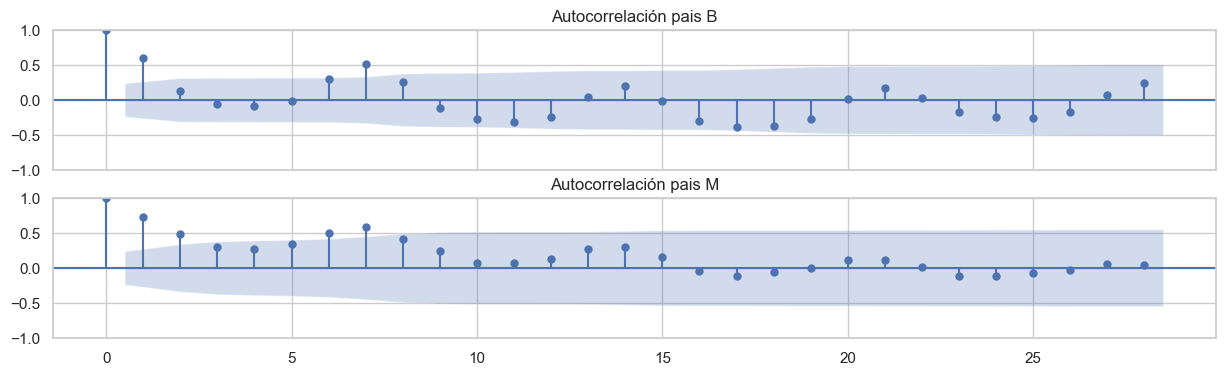

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 4), sharex=True)
plot_acf(datos_b, ax=axs[0], lags=28, alpha=0.05)
axs[0].set_title('Autocorrelación pais B')
plot_acf(datos_m, ax=axs[1], lags=28, alpha=0.05)
axs[1].set_title('Autocorrelación pais M');

#### 1. **Autocorrelacion:** 
   - **País B:** Se aprecia una autocorrelacion semanal, esto puede astar indicando el dia de la semana. 
   - **País M:** Se aprecia una autocorrelacion semanal, esto puede astar indicando el dia de la semana.